<a href="https://colab.research.google.com/github/Riaj509/Thesis-Fake-News-detection-using-transform-model/blob/main/bert_distil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install bnlp_toolkit
! pip install banglanltk
! pip install bnltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 80.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=f3949bfc517ae106077dc3e14262fc8aa03a468c741bef95109d2e13fbb5e9b5
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 11.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-w

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.4 MB/s eta 0:00:00


In [ ]:
! pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 77.5 MB/s eta 0:00:00


In [ ]:
import io
import re
from bnlp.corpus.util import remove_stopwords
from bnltk.stemmer import BanglaStemmer
import banglanltk as bn
from transformers import DistilBertTokenizer, TFDistilBertModel
from matplotlib import font_manager

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [ ]:
import tensorflow as tf
import string
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Input
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Thesis/dataset/final_20k.csv')

In [ ]:
df['label'].astype(int).value_counts()

1    10000
0    10000
Name: label, dtype: int64

In [ ]:
df.head()

,text,label
0,শঙ্কামুক্ত পান্ডিয়া | এশিয়া কাপের ভারত-পাকিস্ত...,1.0
1,কাল বিশ্ব পর্যটন দিবস | আগামীকাল বিশ্ব পর্যটন ...,1.0
2,খালেদা জিয়ার জামিনের মেয়াদ বাড়ল | জিয়া অরফানেজ...,1.0
3,বিশ্ব মিডিয়ায় ২১ আগস্ট মামলার রায় | ২০০৪ সালে ...,1.0
4,উপ-অঞ্চল সেরা হল আজিম মেমোরিয়াল উচ্চ বিদ্যালয় ...,1.0


In [ ]:
from bnlp.corpus import stopwords, punctuations, letters, digits

In [ ]:
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text

In [ ]:
def bn_lemmatization(text):
    return bn.stemmer(text)
def remove_bn_stopwords(text):
    final_text = []
    text = remove_stopwords(text, stopwords)
    for word in text:
      text = remove_stopwords(word, stopwords)
      final_text.append(word)
    return " ".join(final_text)

In [ ]:
def cleaning(text):
    text = remove_bn_stopwords(text)
    text = remove_punctuation(text)
    text = bn_lemmatization(text)
    return text

In [ ]:
df['text']=df['text'].apply(cleaning)

<ipython-input-13-c7ee4a5502b9>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [ ]:
df.head()

,text,label
0,শঙ্কামুক্ত পান্ডিয়া এশিয়া কাপের ভারত পাকিস্তান...,1.0
1,কাল বিশ্ব পর্যটন দিবস আগামীকাল বিশ্ব পর্যটন দি...,1.0
2,খালেদা জিয়ার জামিনের মেয়াদ বাড়ল জিয়া অরফানেজ ট...,1.0
3,বিশ্ব মিডিয়ায় ২১ আগস্ট মামলার রায় ২০০৪ সালে ২১...,1.0
4,উপ অঞ্চল সেরা আজিম মেমোরিয়াল উচ্চ বিদ্যালয় ক্র...,1.0


In [ ]:
distil_bert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distil_bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
max_len=40
sentences=df["text"]
labels=df["label"]
len(sentences),len(labels)

(20000, 20000)

In [ ]:
distil_bert_input=distil_bert_tokenizer.encode_plus(sentences[1],add_special_tokens = True,max_length =max_len,pad_to_max_length =True,truncation=True)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
x=distil_bert_tokenizer.decode(distil_bert_input['input_ids'])
print(x) 

[CLS] কাল বিশব পরযটন দিবস আগামীকাল বিশব পরযটন দিবস । [SEP]


In [ ]:
input_ids=[]
attention_masks=[]

for sent in sentences:
    distil_bert_input_shape=distil_bert_tokenizer.encode_plus(
        sent,add_special_tokens = True,
        max_length =max_len,
        pad_to_max_length = True,
        return_attention_mask = True,
        truncation=True)
    input_ids.append(distil_bert_input_shape['input_ids'])
    attention_masks.append(distil_bert_input_shape['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

In [ ]:
X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
def create_model():
    #two input input_shape and masks
    input_shape = Input(shape = (max_len,), dtype='int64')
    masks= Input(shape = (max_len,), dtype='int64')
    distil_bert_layer = distil_bert_model(input_shape, attention_mask=masks)[0]#last_hidden_state->2D
    dense = Dense(512,activation='relu')(distil_bert_layer)
    dropout= Dropout(0.5)(dense)
    pred = Dense(2, activation='softmax')(dropout)
    model = tf.keras.Model(inputs=[input_shape,masks], outputs=pred)
    print(model.summary())
    return model 

In [ ]:
model=create_model()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['input_5[0][0]',                
 BertModel)                     ast_hidden_state=(N               'input_6[0][0]']                
                                one, 40, 768),                                                    
                                 hidden_states=None                                         

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(loss=loss,optimizer=optimizer, metrics=[metric])

In [ ]:
history=model.fit([X_train_input,train_mask],
                  Y_train_label,
                  batch_size=32,
                  epochs=10,
                  validation_data=([X_test_input,test_mask],Y_test_label)
                  )

Epoch 1/10
500/500 [==============================] - 96s 146ms/step - loss: 0.7022 - accuracy: 0.5028 - val_loss: 0.6913 - val_accuracy: 0.5322
Epoch 2/10
500/500 [==============================] - 71s 141ms/step - loss: 0.6930 - accuracy: 0.5236 - val_loss: 0.6875 - val_accuracy: 0.5393
Epoch 3/10
500/500 [==============================] - 70s 141ms/step - loss: 0.6788 - accuracy: 0.5608 - val_loss: 0.6651 - val_accuracy: 0.5913
Epoch 4/10
500/500 [==============================] - 70s 141ms/step - loss: 0.6467 - accuracy: 0.6204 - val_loss: 0.6489 - val_accuracy: 0.6217
Epoch 5/10
500/500 [==============================] - 70s 140ms/step - loss: 0.6062 - accuracy: 0.6656 - val_loss: 0.5990 - val_accuracy: 0.6855
Epoch 6/10
500/500 [==============================] - 70s 140ms/step - loss: 0.5607 - accuracy: 0.7075 - val_loss: 0.5606 - val_accuracy: 0.7178
Epoch 7/10
500/500 [==============================] - 70s 139ms/step - loss: 0.4973 - accuracy: 0.7609 - val_loss: 0.5145 - val_ac

In [ ]:
prediction= model.predict([X_test_input,test_mask],batch_size=32)
pred_labels = prediction.argmax(axis=1)
accuracy_score(Y_test_label,pred_labels)*100


125/125 [==============================] - 6s 42ms/step


83.875

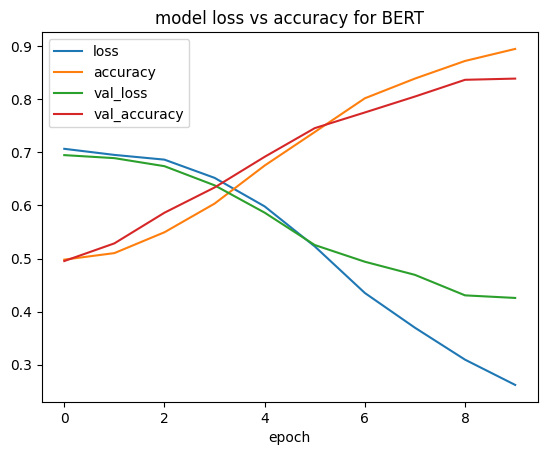

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_loss'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model loss vs accuracy for BERT')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy','val_loss','val_accuracy' ])
pyplot.show() 

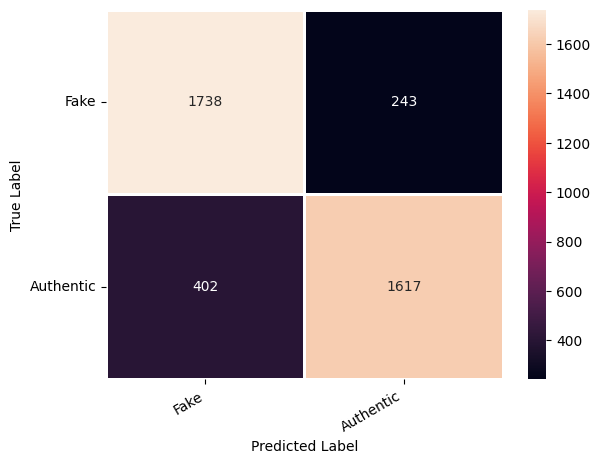

In [ ]:
class_names=['Fake','Authentic']
def show_confusion_matrix(confusion_matrix):
  # hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap = sns.heatmap(confusion_matrix, linewidths=1, annot=True, fmt='g')
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label');
cm = confusion_matrix(Y_test_label, pred_labels)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
print('Classification Report\n')
print(classification_report(Y_test_label,pred_labels))

Classification Report

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      1981
         1.0       0.87      0.80      0.83      2019

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000

